<h3 align='center'> Importando as bibliotecas: <h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 8)

<h3 align='center'> Amostra de dados: <h3>

In [2]:
angulo = np.sort(np.array([90, 84, 78, 72, 66, 60, 54, 48, 42, 36, 30, 24, 18, 12, 6, 0]))

tensao = np.sort(np.array([4.11, 4.01, 3.88, 3.78, 3.69, 3.60, 3.47, 3.36, 3.25, 3.14, 3.02, 2.90, 2.78, 2.65, 2.52, 2.41]))

<h3 align='center'> Obtendo a curva: <h3>

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


α = 0.01886
p = 2.437


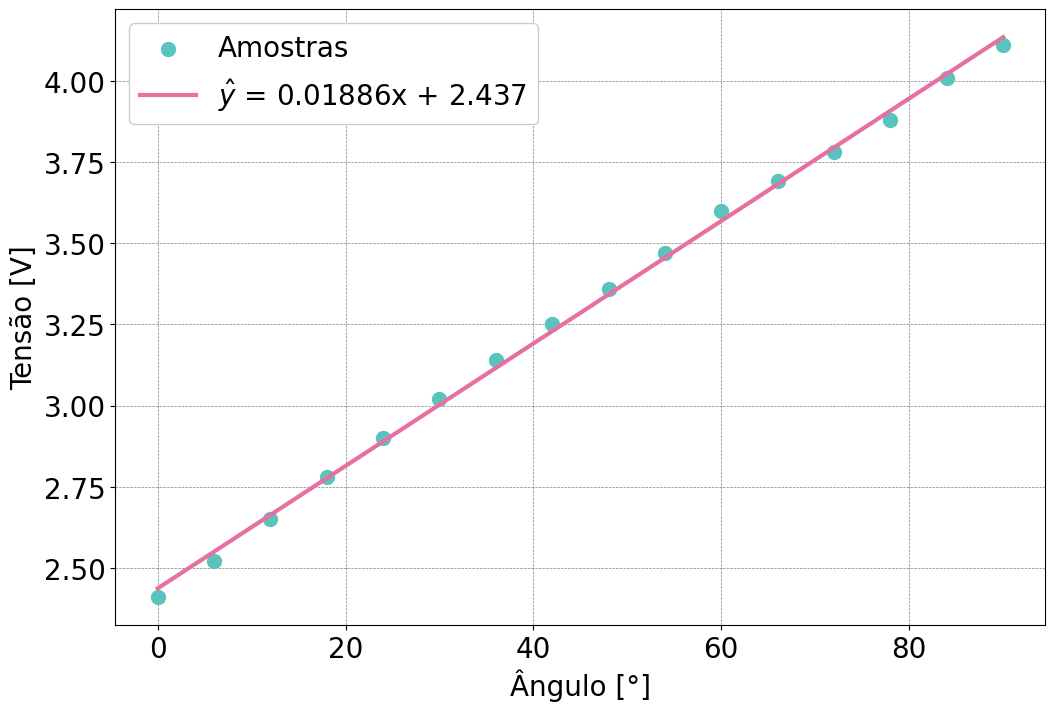

In [3]:
alpha, p = np.polyfit(angulo, tensao, 1)
def f(x):   #Tensão em função do ângulo
    return ((alpha*x) + p)
def f_(x):   #Ângulo em função da tensão
    return ((x-p)/alpha)

plt.figure(1)
plt.scatter(angulo, tensao, linewidths=5, color='C2', label='Amostras')
plt.plot(angulo, f(angulo), color='C1', label='$\hat{y}$'+f' = {alpha:.4}x + {p:.4}')
#plt.title('Relação: Tensão X Ângulo')
plt.ylabel('Tensão [V]')
plt.xlabel('Ângulo [°]')
plt.legend()
plt.savefig('adjust.eps', dpi=600, transparent=True, bbox_inches='tight')
print(f'α = {alpha:.4}')
print(f'p = {p:.4}')

<h3 align='center'> Incerteza do Ajuste: <h3>

In [4]:
def varyx(y, x, p, alpha, gdls):
    return ((1/gdls)*np.sum((y-p-(alpha*x))**2))

def vara(N, Syx2, x):
    return ((N*Syx2)/((N*np.sum(x**2))-(np.sum(x)**2)))

def varp(N, Syx2, x):
    return ((Syx2*np.sum(x**2))/((N*np.sum(x**2))- (np.sum(x)**2)))

In [5]:
N = len(angulo)     #tamanho da amostra
m = 1               # grau do polinômio
nu = (N - 1 - 1)    # nu = N - m - 1 (graus de liberdade, número de amostras e grau do polinômio)

Syx = np.sqrt(varyx(tensao, angulo, p, alpha, nu))

Sa = np.sqrt(vara(N, (Syx**2), angulo))

Sp = np.sqrt(varp(N, (Syx**2), angulo))

print(f'N = {N}')
print(f'S(y,x) = {Syx:.4}')
print(f'S(a) = {Sa:.4}')
print(f'S(p) = {Sp:.4}')

N = 16
S(y,x) = 0.02164
S(a) = 0.0001956
S(p) = 0.01033


In [6]:
t = 2.145   #coeficiente de student (gdl = 14, 95%)

vref = 3.19

uy = (t*(Syx/np.sqrt(N)))

print(f'μ(y) = {uy:.4}')

μ(y) = 0.01161


##### $$\text{Leitura:}$$ $$ y(x) = 3.190 \pm 0.012$$

<h10 align='center'> (Há uma probabilidade de 95% de que a verdadeira indicação do sensor se encontre nesta faixa) <h10>

In [7]:
uc = np.sqrt((((1/alpha)*uy)**2) + (((-1/alpha)*Sp)**2) + ((((p-vref)/(alpha**2))*Sa)**2))  # Incerteza combinada

#k = 1.96
#U = (uc*k)  # Fator de abrangência -> incerteza expandida

U = (uc*t)  # Coeficiente t de Student -> incerteza expandida

ang = f_(vref)

print(f'Ângulo = {ang:.5}')
print(f'μc(x) = {uc:.4}')
print(f'U = {U:.4}')

Ângulo = 39.929
μc(x) = 0.9224
U = 1.979


##### $$\text{Faixa do mensurando verdadeiro:}$$ $$ x = 39.929 \pm 1.979$$

<h10 align='center'> (Há uma probabilidade de 95% de que o valor verdadeiro do mesurando se encontre nesta faixa) <h10>

<h3 align='center'> Sensibilidade: <h3>

In [8]:
K = ((tensao[-1]-tensao[0])/(angulo[-1]-angulo[0]))

print(f'k = {K:.2} V/°')

k = 0.019 V/°


<h3 align='center'> Linearidade: <h3>

In [9]:
erro = (tensao-f(angulo))

lin = ((np.max(erro)/(tensao[-1]-tensao[0]))*100)



print(f'Linearidade: {lin:.4}%')

Linearidade: 1.856%
